#Setting Up enviornment


In [98]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import Activation, Dense, Dropout,Embedding, Input,GlobalMaxPooling1D,Conv1D,MaxPooling1D
from sklearn.preprocessing import LabelBinarizer
import nltk
import seaborn as sns
from keras import regularizers



# Reading Train File with file open option

In [6]:
###############################################Reading_file##########################################
import csv
id = []
categories = []
converse = []
with open('train.csv',) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        id.append(row['ID'])
        categories.append(row['categories'])
        converse.append(row['converse'])

In [158]:
df_woc = pd.read_csv('train.csv',index_col=False)
df_test = pd.read_csv('test.csv',index_col=False)
df_woc.converse=df_woc.converse.astype(str)
df_test.converse=df_test.converse.astype(str)

In [159]:
###########################Lemmetizer#########################################################################
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_woc['converse'] = df_woc['converse'].map(lambda x: lemmatize_text(x))

df_test['converse'] = df_test['converse'].map(lambda x: lemmatize_text(x))

In [160]:
df_woc['converse']

0        [mom, want, to, know, if, the, drugname, need,...
1        [patient, to, discus, drugname, she, say, she,...
2        [letter, of, patient, establishment, request, ...
3        [appointment, question, name, mom, appointment...
4        [please, refax, neurocog, order, to, new, wake...
5        [patient, want, to, reschedule, epidural, from...
6                              [mliform, mliform, mliform]
7                           [md, she, cancelled, this, am]
8        [rov, name, patient, appointment, patient, to,...
9        [patient, clld, to, check, on, a, work, in, ap...
10       [appointment, schedule, am, db, converted, fro...
11       [triage, concussion, patient, ha, a, knot, the...
12       [scheduled, appointment, next, appointment, am...
13       [patient, record, request, name, patient, othe...
14       [drugname, and, keppra, Rx, refill, patient, p...
15       [pcp, patient, had, concussion, from, other, c...
16       [wcb, re, dicuss, injection, appointment, pati.

In [149]:
##########################################Lematizing words####################################################

lmtzr = WordNetLemmatizer()
def filter_lemmatizing_words(train_sentences):
    for i,sentence in enumerate(train_sentences):
        word_token = word_tokenize(sentence)
        tokens_new2 = [lmtzr.lemmatize(token,pos="v") for token in word_token]
        train_sentences[i] = ' '.join(tokens_new2)
    return train_sentences

converse_stop = filter_lemmatizing_words(converse)

In [54]:
converse_stop[0]

'mom want to know if the drugname need some dosage adjust name patient other patients school teacher be report patients be not able to sit still mom want to know if the drugname need some dosage adjust andor be there something patients could take that the school staff could administer please back to discuss mom state patient be have alot of issue with meds and effectiveness lov reschedule to and that be a no show mom apologize for the no show she state they disconnect the home number and only use the appointment schedule for at advd to be here at phone complete appointment schedule marcia richardson lpn'

In [146]:
converse[0]

'mom want to know if the drugname need some dosage adjust name patient other patients school teacher be report patients be not able to sit still mom want to know if the drugname need some dosage adjust andor be there something patients could take that the school staff could administer please back to discuss mom state patient be have alot of issue with meds and effectiveness lov reschedule to and that be a no show mom apologize for the no show she state they disconnect the home number and only use the appointment schedule for at advd to be here at phone complete appointment schedule marcia richardson lpn'

In [13]:
Data = pd.DataFrame({'ID':id , 'categories':categories ,'converse':converse_stop})

In [56]:
class_count

,categories,NAME
PRESCRIPTION,12077,PRESCRIPTION
APPOINTMENTS,11098,APPOINTMENTS
MISCELLANEOUS,9736,MISCELLANEOUS
ASK_A_DOCTOR,9440,ASK_A_DOCTOR
LAB,3457,LAB
JUNK,17,JUNK


Text(0.5,1,'Number of categories and messages')

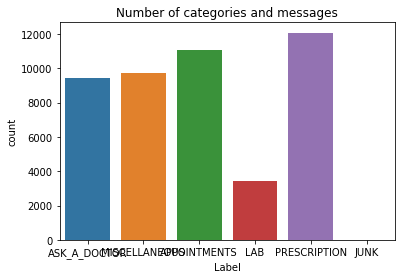

In [171]:
sns.countplot(Data.categories)
plt.xlabel('Label')
plt.title('Number of categories and messages')

# Reading Test File

In [14]:
import csv
t_id = []
t_converse = []
with open('test.csv',) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        t_id.append(row['ID'])
        t_converse.append(row['converse'])

In [15]:
# Removing stopwwords
#t_converse = filter_stop_words(t_converse, stop_words)

# Lematizing Texts
t_converse = filter_lemmatizing_words(t_converse)

Tokenizing words

In [16]:
# 6 categories groups
num_labels = 6
vocab_size = 1000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(Data['converse'])
 
Data_Tokenize = tokenizer.texts_to_matrix(Data['converse'], mode='tfidf')
word_index = tokenizer.word_index

# Encoding Label 
encoder = LabelBinarizer()
encoder.fit(Data['categories'])
Label = encoder.transform(Data['categories'])

In [170]:
word_index

{'to': 1,
 'patient': 2,
 'and': 3,
 'the': 4,
 'for': 5,
 'she': 6,
 'a': 7,
 'of': 8,
 'timephrase': 9,
 'is': 10,
 'mg': 11,
 'on': 12,
 'rn': 13,
 'drugname': 14,
 'with': 15,
 'in': 16,
 'that': 17,
 'her': 18,
 'appointment': 19,
 'tab': 20,
 'please': 21,
 'rx': 22,
 'rna': 23,
 'labtype': 24,
 'pm': 25,
 'by': 26,
 'follow': 27,
 'am': 28,
 'po': 29,
 'at': 30,
 'ha': 31,
 'mom': 32,
 'medication': 33,
 'wa': 34,
 'he': 35,
 'not': 36,
 'will': 37,
 'other': 38,
 'from': 39,
 'if': 40,
 'i': 41,
 'this': 42,
 'be': 43,
 'change': 44,
 'prescription': 45,
 'md': 46,
 'doctor': 47,
 'clinical': 48,
 'need': 49,
 'it': 50,
 'have': 51,
 'list': 52,
 'x': 53,
 'name': 54,
 'would': 55,
 'message': 56,
 'phone': 57,
 'refill': 58,
 'pharmacy': 59,
 'authorized': 60,
 'entered': 61,
 'state': 62,
 'order': 63,
 'you': 64,
 'like': 65,
 'day': 66,
 'can': 67,
 'completed': 68,
 'advise': 69,
 'but': 70,
 'then': 71,
 'request': 72,
 'new': 73,
 'result': 74,
 'back': 75,
 'fax': 76,
 

In [161]:
# 6 categories groups
num_labels = 6
vocab_size = 1000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_woc['converse'])
Data_Tokenize = tokenizer.texts_to_matrix(df_woc['converse'], mode='tfidf')
word_index = tokenizer.word_index

Test_T = tokenizer.texts_to_matrix(df_test['converse'],mode= 'tfidf')
Test_T.shape

# Encoding Label 
encoder = LabelBinarizer()
encoder.fit(Data['categories'])
Label = encoder.transform(Data['categories'])

In [162]:
Data_Tokenize.shape

(45825, 1000)

In [163]:
Test_T.shape

(11455, 1000)

# Splitting train and test


In [164]:
indices = np.arange(Data.shape[0])
np.random.shuffle(indices)
Data_Tokenize = Data_Tokenize[indices]
Label = Label[indices]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Data_Tokenize, Label,test_size=0.2)

In [165]:
class_count = pd.DataFrame(pd.value_counts(Data['categories'], sort = True))
class_count['NAME'] = class_count.index
sorted(class_count['NAME'])

['APPOINTMENTS',
 'ASK_A_DOCTOR',
 'JUNK',
 'LAB',
 'MISCELLANEOUS',
 'PRESCRIPTION']

In [169]:
class_count

,categories,NAME
PRESCRIPTION,12077,PRESCRIPTION
APPOINTMENTS,11098,APPOINTMENTS
MISCELLANEOUS,9736,MISCELLANEOUS
ASK_A_DOCTOR,9440,ASK_A_DOCTOR
LAB,3457,LAB
JUNK,17,JUNK


# MLP Model for #77.5 accuracy


In [166]:
model = Sequential()
model.add(Dense(1024, input_shape=(vocab_size,) , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(800, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(800, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_labels, activation = 'softmax'))
model.summary()
 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 1024)              1025024   
_________________________________________________________________
dropout_36 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 800)               820000    
_________________________________________________________________
dropout_37 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 800)               640800    
_________________________________________________________________
dropout_38 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               102528    
__________

In [167]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
#history = model.fit(x_train, y_train,
                   # batch_size=batch_size,
                   # epochs=100,
                   # verbose=1,
                   # validation_data= (x_test,y_test))

history = model.fit(Data_Tokenize, Label,
                    batch_size=256,
                    epochs=100,
                    verbose=1,validation_split=0.2)

##################################Reached 77.9 accuracY###################################################################

Train on 36660 samples, validate on 9165 samples
Epoch 1/100
36660/36660 [==============================] - 4s 107us/step - loss: 0.7856 - acc: 0.7134 - val_loss: 0.5970 - val_acc: 0.7824
Epoch 2/100
36660/36660 [==============================] - 2s 62us/step - loss: 0.5247 - acc: 0.8058 - val_loss: 0.5537 - val_acc: 0.7892
Epoch 3/100
36660/36660 [==============================] - 2s 62us/step - loss: 0.4131 - acc: 0.8437 - val_loss: 0.6048 - val_acc: 0.7821
Epoch 4/100
36660/36660 [==============================] - 2s 62us/step - loss: 0.3144 - acc: 0.8813 - val_loss: 0.6234 - val_acc: 0.7884131 - acc: 0.8
Epoch 5/100
36660/36660 [==============================] - 2s 62us/step - loss: 0.2336 - acc: 0.9133 - val_loss: 0.7040 - val_acc: 0.7767
Epoch 6/100
36660/36660 [==============================] - 2s 64us/step - loss: 0.1808 - acc: 0.9338 - val_loss: 0.8641 - val_acc: 0.7776
Epoch 7/100
36660/36660 [==============================] - 2s 63us/step - loss: 0.1531 - acc: 0.9428 - val_l

Epoch 59/100
36660/36660 [==============================] - 2s 67us/step - loss: 0.0294 - acc: 0.9904 - val_loss: 1.6538 - val_acc: 0.7776
Epoch 60/100
36660/36660 [==============================] - 2s 68us/step - loss: 0.0255 - acc: 0.9914 - val_loss: 1.7475 - val_acc: 0.7794
Epoch 61/100
36660/36660 [==============================] - 2s 67us/step - loss: 0.0264 - acc: 0.9915 - val_loss: 1.6839 - val_acc: 0.7785
Epoch 62/100
36660/36660 [==============================] - 2s 67us/step - loss: 0.0262 - acc: 0.9909 - val_loss: 1.8103 - val_acc: 0.7723
Epoch 63/100
36660/36660 [==============================] - 2s 67us/step - loss: 0.0256 - acc: 0.9911 - val_loss: 1.6638 - val_acc: 0.7744
Epoch 64/100
36660/36660 [==============================] - 2s 67us/step - loss: 0.0253 - acc: 0.9916 - val_loss: 1.7160 - val_acc: 0.7782
Epoch 65/100
36660/36660 [==============================] - 2s 67us/step - loss: 0.0253 - acc: 0.9916 - val_loss: 1.6430 - val_acc: 0.7744
Epoch 66/100
36660/36660 [=

In [126]:
Pred_mlp_Test = model.predict(Test_T)

In [127]:
labels = sorted(class_count['NAME'])
predicted_label=[]
for i in Pred_mlp_Test:
    print(i)
    predicted_label.append(labels[np.argmax(i)])

[5.5802388e-06 3.1106195e-03 8.4941071e-10 5.0142177e-07 9.9658418e-01
 2.9915562e-04]
[1.6279241e-13 1.0000000e+00 0.0000000e+00 7.0907650e-12 3.8586120e-11
 1.7913154e-12]
[5.1501105e-13 1.0000000e+00 0.0000000e+00 9.6621232e-11 6.0006450e-10
 1.6866805e-11]
[1.7523490e-01 7.6770000e-02 3.5751943e-04 8.4498515e-03 1.6286993e-01
 5.7631779e-01]
[9.3580128e-22 9.0656327e-15 0.0000000e+00 1.3157632e-17 1.0000000e+00
 2.9381150e-19]
[1.0073675e-13 3.3269155e-11 0.0000000e+00 1.9382601e-19 1.8886828e-11
 1.0000000e+00]
[1.8487032e-27 7.3915106e-22 0.0000000e+00 6.9477727e-34 2.2673896e-17
 1.0000000e+00]
[6.5679885e-03 3.1263806e-02 8.1798738e-05 1.4201827e-02 9.4339693e-01
 4.4877017e-03]
[1. 0. 0. 0. 0. 0.]
[7.9979487e-12 2.0148860e-09 2.2584338e-28 1.0000000e+00 8.1568734e-09
 7.1457792e-12]
[9.9466336e-01 3.3225377e-05 1.6240308e-13 7.4239551e-08 5.3032921e-03
 2.1784112e-08]
[4.4746704e-14 1.0000000e+00 0.0000000e+00 2.5469863e-13 3.2893144e-12
 1.4705002e-12]
[2.7153111e-01 6.925393

 1.0000000e+00]
[3.7164147e-30 9.9086132e-21 0.0000000e+00 4.8574692e-36 5.8530576e-22
 1.0000000e+00]
[9.9999905e-01 7.3114398e-07 1.9340542e-28 4.2457769e-13 1.6782491e-07
 6.4873660e-08]
[3.8107849e-19 9.6327945e-18 0.0000000e+00 2.0148617e-29 1.7139934e-15
 1.0000000e+00]
[8.1827122e-05 6.8030727e-01 2.8713808e-20 3.3005890e-05 2.2259407e-04
 3.1935528e-01]
[6.3029584e-06 9.8538750e-01 1.1110597e-20 1.5255830e-05 2.3080772e-04
 1.4360073e-02]
[1.4541948e-07 9.0448317e-08 0.0000000e+00 1.1854293e-14 2.3974295e-07
 9.9999952e-01]
[3.5335719e-24 2.7080856e-16 0.0000000e+00 1.0000000e+00 5.1001214e-16
 3.3899238e-20]
[1.0000000e+00 1.6863059e-09 0.0000000e+00 3.0481382e-18 6.2248096e-11
 9.1290060e-14]
[1.8157223e-05 9.9925810e-01 7.8524495e-18 7.5451549e-05 4.1061730e-04
 2.3779375e-04]
[9.9930000e-01 8.3158644e-05 2.2622286e-23 5.4869758e-11 2.2276404e-06
 6.1456824e-04]
[3.3645967e-01 2.7436659e-02 4.5175220e-08 1.4741923e-05 1.3456626e-01
 5.0152260e-01]
[2.3413420e-28 8.2046639e-2

 9.9999964e-01]
[6.4939235e-07 1.2468173e-04 3.1330740e-07 2.0720062e-01 7.9251403e-01
 1.5972424e-04]
[1.2780198e-07 9.9985397e-01 2.2348765e-24 1.7248086e-06 9.0899091e-05
 5.3319178e-05]
[3.8805748e-03 8.7946728e-03 6.2958457e-06 7.1665279e-05 6.6945505e-01
 3.1779170e-01]
[2.9604188e-08 3.3667427e-05 2.1155883e-29 2.5062812e-08 2.7280190e-05
 9.9993896e-01]
[9.9999964e-01 2.1030789e-07 3.0202141e-29 1.3432528e-13 1.6540537e-07
 3.7614236e-09]
[0. 0. 0. 1. 0. 0.]
[1.7255809e-13 5.8389993e-10 4.3463400e-29 6.3788287e-13 1.0000000e+00
 5.1489905e-13]
[4.6299504e-13 1.3891223e-08 1.6819193e-30 1.0000000e+00 5.3194640e-09
 7.4111143e-12]
[2.1870228e-02 3.7694294e-02 1.3098404e-06 3.1979706e-03 1.9295494e-01
 7.4428123e-01]
[0.0000000e+00 1.2323414e-37 0.0000000e+00 0.0000000e+00 1.0373012e-35
 1.0000000e+00]
[9.3855651e-17 2.6890098e-13 0.0000000e+00 1.0600646e-24 3.3594946e-14
 1.0000000e+00]
[9.6586684e-04 9.9900848e-01 6.6622089e-20 1.7315311e-06 1.6863542e-05
 6.9811790e-06]
[1.0000

 1.0841597e-02]
[4.7880983e-01 4.8864144e-04 3.2548118e-17 1.7117344e-07 5.3999701e-04
 5.2016139e-01]
[7.0054193e-06 3.0578475e-04 1.9209204e-10 9.4895649e-06 7.4414134e-01
 2.5553638e-01]
[3.9129111e-01 3.5209279e-05 1.9280168e-10 2.3438167e-08 1.3100368e-01
 4.7766992e-01]
[2.4279709e-08 1.4734732e-08 3.5406675e-17 1.8567900e-10 9.9999976e-01
 2.5829735e-07]
[1.1632543e-09 1.0000000e+00 7.8601858e-36 1.1691665e-09 1.8824782e-08
 2.6025709e-10]
[1.0000000e+00 4.8865335e-11 0.0000000e+00 1.0129006e-21 3.8855780e-14
 2.9641809e-16]
[4.1474629e-15 2.8794703e-10 0.0000000e+00 2.7513300e-16 4.9474504e-09
 1.0000000e+00]
[9.8392447e-11 2.0449409e-10 7.7302551e-25 1.0244581e-12 1.0000000e+00
 2.2024953e-11]
[1.2994413e-07 9.9999988e-01 6.7684542e-31 2.8969856e-08 5.2989602e-08
 5.6620530e-09]
[4.2466606e-22 7.1629136e-17 0.0000000e+00 9.3556097e-32 1.8659211e-18
 1.0000000e+00]
[6.1209154e-05 2.8643690e-03 4.5290816e-11 3.4159818e-06 9.9706703e-01
 4.0315908e-06]
[3.0461462e-07 9.8132523e-0

 1.0000000e+00]
[2.6941315e-33 1.9274396e-23 0.0000000e+00 0.0000000e+00 6.1518362e-28
 1.0000000e+00]
[2.6554770e-21 4.8968516e-15 0.0000000e+00 2.0397501e-27 1.1225389e-15
 1.0000000e+00]
[2.2957915e-02 1.5511997e-02 1.7147255e-05 4.5755788e-04 9.5952535e-01
 1.5300501e-03]
[7.52114875e-06 5.00333775e-03 1.14350265e-26 8.91834532e-07
 1.11287645e-05 9.94977057e-01]
[1.9882030e-26 2.5455495e-20 0.0000000e+00 2.1002236e-35 7.1702253e-21
 1.0000000e+00]
[1.3214450e-05 1.1441254e-03 3.1841696e-11 2.3087478e-05 9.9875510e-01
 6.4531159e-05]
[9.1863503e-25 1.0000000e+00 0.0000000e+00 1.6649603e-20 3.2378977e-20
 2.7542403e-15]
[1.9117430e-11 2.0735699e-08 1.1763166e-28 1.4972114e-10 6.3397447e-03
 9.9366027e-01]
[1.0036252e-06 1.4435997e-05 1.6739254e-10 9.8387480e-01 1.6049877e-02
 5.9816946e-05]
[2.0408232e-13 1.0000000e+00 0.0000000e+00 8.6093823e-12 6.0587629e-12
 6.8124437e-11]
[2.4237586e-02 8.5693771e-01 3.8534342e-08 3.7244002e-03 5.9469450e-02
 5.5630852e-02]
[3.4721459e-17 1.5667

 1.9441408e-18]
[1.0000000e+00 6.7525246e-29 0.0000000e+00 0.0000000e+00 2.7253871e-35
 0.0000000e+00]
[1.3331858e-03 9.9726868e-01 2.0360060e-13 4.2845117e-04 6.7521475e-04
 2.9450248e-04]
[9.9999964e-01 3.2725848e-07 8.2024413e-28 1.2178081e-13 1.2738501e-08
 2.1054386e-11]
[1.0000000e+00 4.3755589e-11 0.0000000e+00 1.4823036e-21 1.9987532e-12
 1.6705257e-14]
[3.1793806e-27 3.0804001e-18 0.0000000e+00 1.0000000e+00 4.7224669e-20
 5.0327832e-25]
[1.3238000e-22 6.3056604e-19 0.0000000e+00 1.2779215e-31 3.3864150e-16
 1.0000000e+00]
[2.0826540e-09 9.9999940e-01 8.6752203e-33 2.5394531e-08 5.5626975e-07
 4.2366320e-08]
[4.37267903e-23 2.35481131e-15 0.00000000e+00 3.95136690e-30
 1.18368205e-20 1.00000000e+00]
[9.9996340e-01 2.3116270e-05 3.3854706e-20 8.8598540e-10 1.3022845e-05
 5.0693797e-07]
[3.7357208e-28 1.0000000e+00 0.0000000e+00 6.6083377e-23 3.5986929e-23
 1.6689166e-26]
[1.7936747e-05 1.7780030e-01 2.9563363e-18 7.3607378e-05 1.8736724e-04
 8.2192075e-01]
[0.0000000e+00 2.1995

 1.4873537e-07]
[3.5649687e-32 2.5444556e-25 0.0000000e+00 0.0000000e+00 1.3934033e-22
 1.0000000e+00]
[9.9999690e-01 2.6065620e-06 1.6698956e-22 4.6523098e-11 5.1134487e-07
 5.8271796e-09]
[1.7832887e-01 5.5830952e-02 5.4410684e-05 1.8629414e-03 1.8316153e-01
 5.8076131e-01]
[0.26833293 0.0060101  0.16353501 0.11671404 0.43794504 0.00746289]
[2.9728410e-14 1.0000000e+00 0.0000000e+00 7.0742904e-14 8.2239684e-13
 2.2717761e-12]
[1.0000000e+00 4.2896373e-10 0.0000000e+00 3.5667046e-20 1.4848976e-11
 1.1382656e-14]
[2.9678291e-03 9.6953583e-01 2.6151747e-09 1.0553644e-03 2.3245636e-02
 3.1953913e-03]
[3.2600974e-26 1.4485926e-18 0.0000000e+00 3.2676078e-32 1.7923923e-19
 1.0000000e+00]
[1.00000e+00 8.93474e-34 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
[1.3244535e-10 8.4808133e-05 0.0000000e+00 6.6298061e-12 1.8983069e-10
 9.9991524e-01]
[7.4228449e-03 5.2447599e-01 5.0914655e-06 2.5937419e-02 1.6240157e-01
 2.7975708e-01]
[9.9998915e-01 3.1918893e-07 1.5860192e-24 1.9989184e-12 1.

 2.7567978e-05]
[3.18980604e-33 1.00662864e-23 0.00000000e+00 1.00000000e+00
 1.53187864e-22 2.57746031e-29]
[1.1536917e-23 1.0000000e+00 0.0000000e+00 2.9450003e-22 3.7461537e-20
 5.1370786e-18]
[8.5560640e-16 2.5693775e-13 0.0000000e+00 2.2604857e-20 4.8973314e-10
 1.0000000e+00]
[4.7181441e-28 1.0000000e+00 0.0000000e+00 2.4316176e-24 3.3677765e-22
 7.1504083e-25]
[9.5401716e-01 4.5654397e-02 4.3523263e-15 9.3366752e-06 4.6138881e-05
 2.7290784e-04]
[1.3153668e-05 8.4121609e-03 9.1151382e-23 1.8082251e-06 1.2804847e-04
 9.9144489e-01]
[8.5321618e-03 2.9246270e-04 2.0512802e-15 2.9200518e-07 5.1976605e-03
 9.8597741e-01]
[3.2312083e-36 1.0568188e-23 0.0000000e+00 1.0000000e+00 2.2581455e-24
 3.5562793e-30]
[3.1808214e-10 7.4663853e-10 2.0510455e-22 5.4914346e-12 1.0000000e+00
 1.7494528e-08]
[2.4422236e-17 1.1874841e-15 0.0000000e+00 1.4286387e-26 1.3553691e-14
 1.0000000e+00]
[5.2015562e-12 5.1246559e-12 3.4539526e-26 3.6722172e-13 1.0000000e+00
 2.6167730e-09]
[5.7919247e-25 4.7604

 9.6978360e-01]
[3.0324818e-04 3.9808160e-01 1.6676073e-07 2.0518899e-03 5.9864676e-01
 9.1623212e-04]
[2.1893220e-05 1.7589549e-05 3.5351066e-11 3.8491757e-07 9.9995458e-01
 5.6295230e-06]
[9.9999964e-01 3.5780204e-07 1.5198150e-33 4.5505621e-15 4.4872777e-09
 2.6214794e-08]
[5.7261957e-05 6.5121931e-05 6.2081777e-11 2.1190039e-05 9.9980611e-01
 5.0252504e-05]
[1.2579083e-15 5.6075641e-13 0.0000000e+00 4.3014745e-22 8.9923569e-11
 1.0000000e+00]
[0.0000000e+00 2.1434170e-38 0.0000000e+00 0.0000000e+00 4.8603766e-37
 1.0000000e+00]
[2.1846570e-05 9.9753845e-01 2.6758509e-16 4.0171341e-05 1.9671584e-03
 4.3241013e-04]
[1.0573626e-09 8.8471991e-01 0.0000000e+00 2.5251495e-07 1.5170828e-09
 1.1527984e-01]
[3.9624011e-15 1.0000000e+00 0.0000000e+00 3.4367676e-15 1.3286476e-13
 5.3748434e-13]
[6.1105107e-05 7.6698037e-05 3.3551268e-09 5.9630920e-06 9.9958152e-01
 2.7470812e-04]
[4.0139651e-01 1.4110649e-01 3.4987323e-05 4.8649712e-03 6.0627881e-02
 3.9196923e-01]
[9.99999285e-01 3.29500160e

 4.8046568e-34]
[4.33965540e-14 1.00000000e+00 0.00000000e+00 6.60317992e-13
 3.89862491e-12 1.07129805e-14]
[4.8346561e-01 1.3391908e-03 2.3473705e-04 1.1094583e-03 5.1225078e-01
 1.6002036e-03]
[1.1228626e-05 1.4483889e-04 2.3763369e-14 4.0876307e-06 7.6602750e-02
 9.2323709e-01]
[3.5440868e-01 9.6220756e-03 2.8678171e-05 6.3317329e-01 2.2175785e-03
 5.4970896e-04]
[2.9873404e-06 8.1621706e-01 6.2790242e-25 4.4240205e-05 1.1724400e-05
 1.8372399e-01]
[8.8305590e-31 2.1069391e-21 0.0000000e+00 1.0000000e+00 1.0220222e-20
 1.4431429e-26]
[1.0000000e+00 1.4541181e-18 0.0000000e+00 3.0882315e-36 2.1531117e-23
 2.4050798e-29]
[1.40677512e-04 5.26745862e-05 3.09121462e-09 1.01240585e-05
 9.99773085e-01 2.34571198e-05]
[2.2595446e-10 6.7708554e-09 2.5723338e-21 3.8888703e-10 1.0000000e+00
 9.8343479e-11]
[6.0063314e-01 3.9880243e-01 2.4086056e-11 2.9841329e-05 4.5497925e-04
 7.9682584e-05]
[1.6278460e-05 3.8174225e-05 5.0473365e-11 3.3660135e-06 9.9992406e-01
 1.8066465e-05]
[1.6234338e-01 

[1.3900682e-16 2.5666525e-18 0.0000000e+00 4.4907053e-31 4.0134081e-15
 1.0000000e+00]
[1.2034216e-12 5.4021586e-14 3.1608596e-31 6.9102728e-17 1.0000000e+00
 3.4816744e-14]
[2.6111500e-03 9.7391486e-01 3.1329865e-09 8.9335274e-03 1.1787281e-02
 2.7532438e-03]
[7.4945967e-24 6.7597684e-21 0.0000000e+00 1.1202596e-36 3.1752620e-18
 1.0000000e+00]
[7.4688340e-29 9.3124762e-20 0.0000000e+00 7.4820428e-35 7.7538085e-21
 1.0000000e+00]
[1.6878364e-10 9.2858372e-08 0.0000000e+00 6.3064686e-14 1.4619781e-07
 9.9999976e-01]
[1.0897928e-29 6.5571443e-28 0.0000000e+00 3.3752077e-31 1.0000000e+00
 5.8230582e-30]
[2.6383176e-13 1.7335727e-11 1.4099710e-33 6.6569722e-14 1.0000000e+00
 3.1405810e-14]
[1.6097474e-24 2.6312274e-20 0.0000000e+00 5.5211356e-38 9.9873123e-22
 1.0000000e+00]
[5.5506848e-21 6.3250579e-14 0.0000000e+00 1.0498788e-24 3.3861972e-15
 1.0000000e+00]
[2.7657289e-21 6.1224956e-15 0.0000000e+00 1.0000000e+00 1.6282269e-15
 1.6229943e-21]
[5.6993067e-16 2.3201337e-12 6.0920859e-32 

 1.2219356e-14]
[4.8115926e-18 1.4805726e-16 0.0000000e+00 1.3792737e-28 3.3192566e-16
 1.0000000e+00]
[5.6883291e-04 9.9906200e-01 2.8648308e-15 1.5075963e-04 1.5887759e-04
 5.9548198e-05]
[1.0000000e+00 3.3802433e-10 0.0000000e+00 1.3766781e-19 7.3357197e-12
 9.2383071e-14]
[3.6818570e-15 1.0000000e+00 0.0000000e+00 1.2191264e-13 7.0217589e-13
 4.2910770e-14]
[1.5265282e-10 9.8067963e-01 8.7193351e-27 1.2518385e-07 1.9320315e-02
 2.5866391e-09]
[1.3609948e-02 4.5052466e-01 1.8258031e-06 4.2599039e-03 1.0942293e-01
 4.2218071e-01]
[8.1324904e-15 8.0841495e-14 0.0000000e+00 7.3286125e-24 1.0437277e-12
 1.0000000e+00]
[0.0000000e+00 1.8847466e-29 0.0000000e+00 1.0000000e+00 1.0212225e-29
 0.0000000e+00]
[1.5668243e-11 9.9999976e-01 4.9878961e-36 5.6327112e-09 2.5368945e-07
 3.2808128e-11]
[6.0959553e-07 9.9982685e-01 4.1405140e-24 1.2016573e-06 9.9367178e-05
 7.2014889e-05]
[5.1725124e-07 7.9751593e-01 4.9317719e-32 8.6542151e-08 1.7003110e-06
 2.0248185e-01]
[2.0495578e-07 9.9999344e-0

[1.1696559e-07 4.2968411e-03 2.5391840e-22 6.9958912e-03 1.8818640e-04
 9.8851901e-01]
[9.9292386e-01 2.2652545e-03 1.7186648e-11 1.3282093e-05 4.7266991e-03
 7.0922426e-05]
[1.5754836e-13 1.0000000e+00 0.0000000e+00 1.0708619e-12 3.9841134e-11
 5.3380890e-11]
[3.8845351e-12 1.3719144e-08 0.0000000e+00 5.0631792e-13 4.4966680e-07
 9.9999952e-01]
[3.2639015e-02 1.3097976e-01 6.9044658e-04 3.3466108e-02 8.0221367e-01
 1.1021903e-05]
[1.7684096e-02 2.9476023e-05 3.0291205e-06 8.0665232e-06 9.8223346e-01
 4.1848274e-05]
[5.34564955e-04 1.09652814e-04 1.81277215e-08 1.06878169e-05
 9.99280512e-01 6.45699693e-05]
[3.080650e-31 4.423396e-23 0.000000e+00 0.000000e+00 3.610747e-26
 1.000000e+00]
[1.06155175e-35 2.24006153e-30 0.00000000e+00 0.00000000e+00
 4.85624529e-29 1.00000000e+00]
[1.0249176e-23 3.0071707e-19 0.0000000e+00 7.3178162e-35 2.7254274e-21
 1.0000000e+00]
[0.03720991 0.06846478 0.00241264 0.01715856 0.8699382  0.00481595]
[1.0000000e+00 2.3393303e-08 1.4363331e-33 4.3443134e-16

 0.000000e+00]
[0.05200032 0.19247113 0.00201518 0.0172191  0.70663685 0.02965744]
[1.8174939e-21 1.0000000e+00 0.0000000e+00 2.0391526e-18 1.6331207e-17
 4.4080424e-19]
[2.6198710e-19 1.0000000e+00 0.0000000e+00 4.9352184e-16 1.3753364e-16
 1.1031317e-13]
[9.5092855e-17 1.0000000e+00 0.0000000e+00 9.1009065e-15 1.8235016e-13
 1.1495800e-15]
[4.5705000e-01 2.0089357e-01 1.5394000e-06 1.9417937e-03 2.0980587e-02
 3.1913254e-01]
[1.0000000e+00 1.2567772e-10 0.0000000e+00 1.4453621e-20 2.6037882e-13
 5.1198652e-17]
[1.1741137e-25 2.4791469e-20 0.0000000e+00 3.3729097e-35 8.4565550e-21
 1.0000000e+00]
[3.9502587e-19 3.5853888e-15 0.0000000e+00 1.7736679e-26 4.8231775e-15
 1.0000000e+00]
[3.8046931e-06 9.9992895e-01 1.1223480e-22 7.0175365e-06 2.2440488e-05
 3.7768186e-05]
[1.0000000e+00 1.8708868e-09 0.0000000e+00 5.0752738e-18 1.6126454e-09
 5.7765777e-14]
[2.9351889e-07 2.9913371e-03 1.5044324e-30 2.2066897e-07 3.0907029e-06
 9.9700505e-01]
[9.3490743e-11 1.0000000e+00 1.6414600e-38 2.23

 1.0000000e+00]
[1.0000000e+00 2.5274824e-14 0.0000000e+00 1.3418143e-28 9.2609151e-16
 3.2999463e-20]
[1.2847597e-16 4.2311909e-12 0.0000000e+00 1.0000000e+00 1.6771968e-12
 1.3296198e-15]
[4.0958415e-08 3.8954662e-05 2.3227704e-09 5.2103794e-01 4.7892034e-01
 2.6881125e-06]
[9.9999893e-01 1.0812472e-06 4.2663374e-36 1.1951950e-15 2.1138277e-10
 1.7111066e-12]
[8.517505e-24 5.555878e-20 0.000000e+00 1.613064e-35 4.411171e-19
 1.000000e+00]
[1.2667706e-27 9.2264100e-20 0.0000000e+00 8.0061428e-35 2.0985317e-22
 1.0000000e+00]
[1.0602116e-02 8.5600811e-01 1.5306617e-06 1.1909513e-02 1.1603012e-01
 5.4487125e-03]
[0.0000000e+00 4.7912231e-34 0.0000000e+00 0.0000000e+00 1.6529586e-31
 1.0000000e+00]
[4.35881184e-28 1.62535032e-19 0.00000000e+00 1.00000000e+00
 1.02504086e-19 1.73917723e-25]
[9.5861763e-01 4.0889733e-02 3.4983350e-11 1.4866090e-04 1.7985876e-04
 1.6412413e-04]
[4.7425734e-09 3.6535300e-07 1.1186367e-16 6.5406802e-08 4.4977781e-01
 5.5022174e-01]
[1.3390706e-09 1.8587527e-1

[6.4177111e-06 2.0720518e-05 4.7046584e-24 8.1163254e-09 2.6598887e-04
 9.9970680e-01]
[3.0199174e-28 1.1498867e-23 0.0000000e+00 0.0000000e+00 1.0939291e-21
 1.0000000e+00]
[1.2015917e-07 9.9998248e-01 3.0907063e-24 1.0620354e-05 6.2472022e-06
 5.5820482e-07]
[1.0000000e+00 1.1407386e-22 0.0000000e+00 0.0000000e+00 4.2669923e-29
 3.5046115e-34]
[1.00630383e-20 1.00000000e+00 0.00000000e+00 1.42759992e-16
 1.10410255e-16 9.09024509e-17]
[3.1496507e-18 9.9172094e-11 0.0000000e+00 7.9541138e-21 4.9766966e-16
 1.0000000e+00]
[5.2065434e-06 3.0915093e-05 3.4171777e-11 6.4360452e-06 9.9995017e-01
 7.2521434e-06]
[5.3631143e-06 1.7074937e-03 4.4609138e-22 1.2817454e-06 2.3740919e-04
 9.9804842e-01]
[3.5276193e-02 1.2808388e-02 9.4266485e-05 7.6379644e-04 7.3515153e-01
 2.1590586e-01]
[2.8885294e-18 1.0000000e+00 0.0000000e+00 1.0751289e-16 7.7846515e-16
 1.7209358e-14]
[5.31314435e-25 1.00000000e+00 0.00000000e+00 1.52572753e-20
 6.68902575e-20 1.30508365e-20]
[4.1579000e-16 1.0000000e+00 0.

[9.9999893e-01 9.1714998e-07 7.4042078e-28 4.1585307e-12 1.4079644e-07
 7.8698376e-10]
[2.0235753e-09 9.9999833e-01 9.8783237e-37 6.3635071e-09 5.2077525e-08
 1.6276913e-06]
[0.0000000e+00 3.9433390e-31 0.0000000e+00 0.0000000e+00 3.0577625e-30
 1.0000000e+00]
[3.9107756e-29 1.4944596e-21 0.0000000e+00 1.0000000e+00 1.3440752e-18
 7.7615467e-25]
[1.0000000e+00 2.2921224e-17 0.0000000e+00 1.4876591e-33 3.8093420e-21
 1.5525255e-25]
[4.4034850e-03 2.3655724e-05 4.1185690e-08 6.1761244e-07 9.9556160e-01
 1.0564835e-05]
[9.5458826e-25 1.0000000e+00 0.0000000e+00 1.3516983e-21 1.3116068e-20
 5.5050736e-21]
[1.6014507e-11 9.9698973e-01 0.0000000e+00 2.5291989e-12 1.4799786e-11
 3.0102734e-03]
[1.1099667e-08 1.7141228e-04 1.0818707e-19 9.9982482e-01 3.5623591e-06
 1.8816505e-07]
[4.1583207e-01 2.1567084e-04 2.0783152e-06 2.8873021e-06 5.7483906e-01
 9.1082072e-03]
[0. 0. 0. 0. 0. 1.]
[2.7367847e-05 9.9983978e-01 3.3441364e-19 1.5430500e-05 1.0409495e-04
 1.3292221e-05]
[6.0128818e-36 1.000000

 9.8695183e-01]
[9.9999964e-01 3.9676112e-07 8.6936800e-32 2.7915424e-14 1.2832412e-08
 9.6515417e-12]
[9.5064741e-01 9.4472850e-04 2.3833431e-09 4.5479079e-05 4.8324056e-02
 3.8446931e-05]
[2.4007609e-06 9.9992669e-01 1.5536004e-20 1.2806470e-05 5.7970297e-05
 2.7397567e-07]
[0.08625109 0.04498263 0.00626092 0.02056036 0.83134377 0.01060116]
[1.4073433e-03 1.0596250e-02 4.0581668e-05 5.9138234e-03 8.5638922e-01
 1.2565280e-01]
[2.9615523e-09 1.1329364e-08 1.4099596e-19 3.0248221e-10 1.0000000e+00
 2.2563071e-09]
[1.0000000e+00 3.7869533e-08 8.3572168e-33 1.3318636e-15 2.6899627e-10
 5.5582719e-13]
[6.5973672e-06 1.1114074e-05 6.5521642e-12 3.0711035e-07 9.9996448e-01
 1.7475224e-05]
[3.4526745e-03 1.0106705e-02 1.3039597e-07 1.0870477e-03 1.9570115e-01
 7.8965229e-01]
[1.8855213e-16 1.0000000e+00 0.0000000e+00 1.5893287e-12 7.4254860e-13
 1.0608304e-14]
[9.9999559e-01 4.4288681e-06 5.1934861e-26 7.8390020e-12 5.2886485e-08
 2.0491107e-09]
[9.5896536e-01 9.9852839e-03 6.2101719e-09 9.2

In [128]:
Pred_mlp_final = pd.DataFrame({'ID': t_id, 'categories': predicted_label})

In [130]:
Pred_mlp_final

,ID,categories
0,1,MISCELLANEOUS
1,4,ASK_A_DOCTOR
2,7,ASK_A_DOCTOR
3,13,PRESCRIPTION
4,18,MISCELLANEOUS
5,26,PRESCRIPTION
6,39,PRESCRIPTION
7,43,MISCELLANEOUS
8,53,APPOINTMENTS
9,63,LAB


In [131]:
Pred_mlp_final.to_csv('Prediction_mlp.csv',index=False)

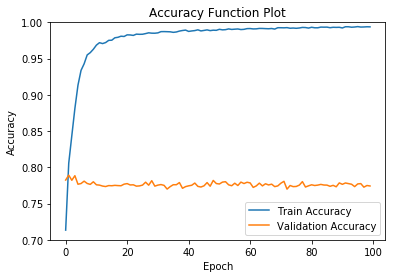

In [168]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Function Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.show()

In [85]:
labels = sorted(class_count['NAME'])
Final = []
for x in predict_Test:
    pre_val = labels[x]
    Final.append(pre_val)

['ASK_A_DOCTOR',
 'ASK_A_DOCTOR',
 'ASK_A_DOCTOR',
 'ASK_A_DOCTOR',
 'MISCELLANEOUS',
 'PRESCRIPTION',
 'PRESCRIPTION',
 'MISCELLANEOUS',
 'APPOINTMENTS',
 'LAB',
 'APPOINTMENTS',
 'ASK_A_DOCTOR',
 'APPOINTMENTS',
 'ASK_A_DOCTOR',
 'APPOINTMENTS',
 'ASK_A_DOCTOR',
 'PRESCRIPTION',
 'ASK_A_DOCTOR',
 'MISCELLANEOUS',
 'MISCELLANEOUS',
 'PRESCRIPTION',
 'ASK_A_DOCTOR',
 'LAB',
 'APPOINTMENTS',
 'ASK_A_DOCTOR',
 'ASK_A_DOCTOR',
 'MISCELLANEOUS',
 'APPOINTMENTS',
 'ASK_A_DOCTOR',
 'APPOINTMENTS',
 'MISCELLANEOUS',
 'ASK_A_DOCTOR',
 'ASK_A_DOCTOR',
 'PRESCRIPTION',
 'MISCELLANEOUS',
 'ASK_A_DOCTOR',
 'MISCELLANEOUS',
 'PRESCRIPTION',
 'APPOINTMENTS',
 'PRESCRIPTION',
 'PRESCRIPTION',
 'APPOINTMENTS',
 'MISCELLANEOUS',
 'APPOINTMENTS',
 'APPOINTMENTS',
 'PRESCRIPTION',
 'MISCELLANEOUS',
 'APPOINTMENTS',
 'ASK_A_DOCTOR',
 'LAB',
 'PRESCRIPTION',
 'MISCELLANEOUS',
 'ASK_A_DOCTOR',
 'APPOINTMENTS',
 'APPOINTMENTS',
 'APPOINTMENTS',
 'APPOINTMENTS',
 'APPOINTMENTS',
 'LAB',
 'ASK_A_DOCTOR',
 'PRE

In [28]:
np.array(Final).shape

(11455,)

In [32]:
Pred1 = pd.DataFrame({'ID': t_id, 'categories': Final})

In [35]:
###############################using glove vector#######################################################################
import os
embeddings_index = {}
f = open('glove.6B.300d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [37]:
word_index

{'to': 1,
 'be': 2,
 'patients': 3,
 'and': 4,
 'the': 5,
 'for': 6,
 'she': 7,
 'have': 8,
 'of': 9,
 'patient': 10,
 'timephrase': 11,
 'a': 12,
 'mg': 13,
 'on': 14,
 'drugname': 15,
 'rn': 16,
 'with': 17,
 'in': 18,
 'that': 19,
 'her': 20,
 'please': 21,
 'rx': 22,
 'rna': 23,
 'follow': 24,
 'labtype': 25,
 'pm': 26,
 'by': 27,
 'appointment': 28,
 'po': 29,
 'at': 30,
 'mom': 31,
 'not': 32,
 'change': 33,
 'tabs': 34,
 'he': 35,
 'will': 36,
 'need': 37,
 'other': 38,
 'from': 39,
 'if': 40,
 'i': 41,
 'this': 42,
 'schedule': 43,
 'state': 44,
 'do': 45,
 'doctor': 46,
 'md': 47,
 'clinical': 48,
 'fax': 49,
 'list': 50,
 'request': 51,
 'x': 52,
 'advise': 53,
 'name': 54,
 'would': 55,
 'message': 56,
 'it': 57,
 'phone': 58,
 'take': 59,
 'refill': 60,
 'order': 61,
 'pharmacy': 62,
 'authorize': 63,
 'enter': 64,
 'medication': 65,
 'send': 66,
 'see': 67,
 'prescription': 68,
 'give': 69,
 'can': 70,
 'you': 71,
 'complete': 72,
 'like': 73,
 'want': 74,
 'speak': 75,
 '

In [41]:
# prepare embedding matrix
MAX_NUM_WORDS=20000
max_len=1000
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.2
nb_epochs = 50
num_words = min(MAX_NUM_WORDS, len(word_index))
embedding_matrix = np.zeros((num_words, 300))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer_glove = Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

In [42]:
print('Training model.')

from keras.layers import CuDNNLSTM, Dropout
sequence_input = Input(shape=(1000,), dtype='int32')
Y=Embedding(num_words,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)
x=Y(sequence_input)
#z = Dropout(0.2)(embedded_sequences)
z = CuDNNLSTM(128)(x)
#z = Dropout(0.4)(z)
preds_lstm = Dense(6, activation='softmax')(z)


from keras.optimizers import Adam
model_lstm = Model(sequence_input, preds_lstm)
model_lstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

Training model.


# CNN model


In [50]:
print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(1000,), dtype='int32')
Y=Embedding(num_words,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)
x=Y(sequence_input)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(4)(x)
x = Conv1D(128, 4, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(6, activation='softmax')(x)

from keras.optimizers import Adam
model_cnn = Model(sequence_input, preds)
model_cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

###############################Reached only 40% accuracy###########################################

Training model.


In [71]:
model_lstm_hist = model_cnn1.fit(Data_Tokenize, Label,batch_size=256,epochs=20).history

Epoch 1/20
45825/45825 [==============================] - 52s 1ms/step - loss: 0.7337 - acc: 0.7254
Epoch 2/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.7143 - acc: 0.7288
Epoch 3/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.7137 - acc: 0.7298
Epoch 4/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.7063 - acc: 0.7338
Epoch 5/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.6874 - acc: 0.7405
Epoch 6/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.6728 - acc: 0.7456
Epoch 7/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.6655 - acc: 0.7463
Epoch 8/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.6548 - acc: 0.7508
Epoch 9/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.6503 - acc: 0.7527
Epoch 10/20
45825/45825 [==============================] - 51s 1ms/step - loss: 0.6425 - acc: 0.7576

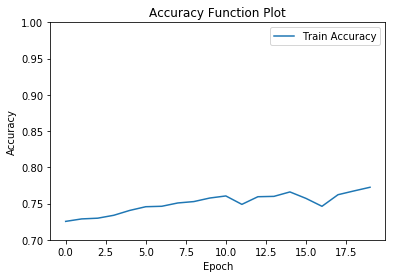

In [151]:
model_lstm_hist
######################################Accuracy :35#############################################
import matplotlib.pyplot as plt
plt.plot(model_lstm_hist['acc'])
plt.title('Accuracy Function Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend(['Train Accuracy'])
plt.show()

In [72]:
model_cnn1.evaluate(Data_Tokenize,Label)

45825/45825 [==============================] - 26s 575us/step


[0.5136364605227781, 0.8102564102564103]

In [73]:
Pred_CNN_Test = model_cnn1.predict(Test_T)

In [75]:
labels = sorted(class_count['NAME'])
predicted_label=[]
for i in Pred_CNN_Test:
    print(i)
    predicted_label.append(labels[np.argmax(i)])
#Final = []
#for x in predict_Test:
#    pre_val = labels[x]
#    Final.append(pre_val)

In [77]:
predicted_label=[]
for i in Pred_CNN_Test:
    print(i)
    predicted_label.append(labels[np.argmax(i)])

[3.6962637e-01 3.7182774e-02 2.3246235e-05 1.3013020e-02 3.0638462e-01
 2.7376992e-01]
[7.7903585e-04 9.2282778e-01 3.5337358e-08 1.3375226e-04 5.5456674e-03
 7.0713595e-02]
[5.4207351e-02 4.1121551e-01 1.3951872e-06 3.9443015e-03 4.8452163e-01
 4.6109840e-02]
[1.4928786e-01 4.1789126e-01 3.7050624e-05 1.1217444e-02 1.4573108e-01
 2.7583531e-01]
[3.1882754e-04 2.1023111e-04 9.4731519e-08 6.8060793e-03 9.9091220e-01
 1.7525067e-03]
[2.7209946e-03 1.2409574e-02 1.2412271e-06 1.5194896e-03 4.4368492e-03
 9.7891188e-01]
[1.1362549e-03 9.6939935e-04 2.0844553e-07 5.5668876e-04 9.6439226e-03
 9.8769361e-01]
[0.18252385 0.13670357 0.00217785 0.17043048 0.3707607  0.13740349]
[9.9760664e-01 1.4105774e-04 9.4202705e-06 1.9001172e-04 1.7085471e-03
 3.4426301e-04]
[1.2903722e-01 3.5409471e-01 2.0371252e-05 3.3559707e-01 1.2453818e-01
 5.6712393e-02]
[2.0852183e-01 3.6601774e-02 1.4397837e-04 1.7723583e-02 5.4719269e-01
 1.8981613e-01]
[1.5047808e-03 7.3433644e-01 6.2669727e-07 4.5360494e-04 3.891

[9.3301982e-03 2.5238508e-01 1.8827619e-06 1.1178202e-02 5.2408522e-01
 2.0301946e-01]
[9.9182034e-01 7.2634772e-05 8.2986053e-06 1.6644376e-03 6.1533973e-03
 2.8109815e-04]
[1.9770654e-01 6.0050446e-03 4.9734779e-05 3.4420404e-01 4.4804636e-01
 3.9883712e-03]
[1.3627568e-01 7.2255568e-03 6.4128340e-06 1.8900452e-02 7.8624433e-01
 5.1347591e-02]
[4.21911895e-01 6.54635485e-03 2.34997824e-05 3.45084369e-02
 5.25057435e-01 1.19523825e-02]
[9.9930942e-01 1.8406686e-04 1.6770470e-07 1.3272494e-05 3.8268956e-04
 1.1053615e-04]
[7.1233144e-04 2.1603741e-03 1.0624619e-06 5.9927399e-05 1.0902705e-02
 9.8616356e-01]
[1.3644244e-03 4.2820312e-04 4.9283969e-08 1.0059181e-04 2.4067506e-03
 9.9570000e-01]
[1.2273824e-02 9.4519657e-01 2.8699006e-07 5.5506499e-04 9.9034254e-03
 3.2070853e-02]
[1.5709659e-01 7.9844493e-01 7.7575642e-08 9.7154191e-04 2.1122653e-02
 2.2364140e-02]
[7.9955593e-02 1.9123015e-01 4.5637571e-05 6.3377090e-02 4.0051214e-02
 6.2534034e-01]
[1.0666551e-02 3.1569493e-01 1.694216

[7.0045487e-04 1.7306840e-03 6.1860865e-06 2.7427278e-04 2.8746312e-02
 9.6854210e-01]
[3.4955266e-01 5.9193433e-03 1.0705621e-05 3.2561744e-04 3.2714043e-02
 6.1147761e-01]
[1.3453054e-03 1.0544294e-02 1.4535318e-07 2.5014813e-05 3.6927287e-03
 9.8439252e-01]
[7.3734540e-03 5.5825440e-03 4.9286614e-06 4.8345540e-02 9.2602676e-01
 1.2666752e-02]
[6.1631340e-01 7.2081820e-03 2.8501533e-04 8.1752039e-02 2.7463600e-01
 1.9805318e-02]
[2.9304481e-01 2.7014470e-01 7.6269130e-06 2.7793143e-03 3.8901100e-01
 4.5012560e-02]
[8.3625525e-01 9.1382965e-02 3.1681798e-06 7.9951040e-04 5.4736495e-02
 1.6822586e-02]
[1.3013017e-01 1.8516503e-01 7.2467046e-05 3.4651488e-02 5.9523368e-01
 5.4747202e-02]
[5.3030113e-03 4.0889163e-02 3.7204660e-05 8.2166138e-04 1.3594948e-02
 9.3935400e-01]
[1.4583922e-03 1.2292125e-02 9.3230610e-06 2.5213080e-02 3.3334380e-01
 6.2768328e-01]
[1.3193593e-03 1.1805160e-04 2.7153926e-06 1.6260163e-05 9.9803931e-01
 5.0431816e-04]
[2.0919486e-05 1.0564153e-04 2.3563560e-09 

 1.6607951e-01]
[1.1808274e-02 2.3350246e-02 3.4418463e-07 9.3619251e-01 1.3455451e-02
 1.5193178e-02]
[9.9994147e-01 3.6736631e-07 1.1243370e-08 1.2401766e-05 4.2789419e-05
 2.9415510e-06]
[1.2664194e-02 5.8669448e-01 2.9079549e-06 1.3052757e-03 2.5313310e-02
 3.7401977e-01]
[6.36911904e-03 9.36737135e-02 7.16912325e-07 2.04565888e-03
 7.90882051e-01 1.07028835e-01]
[3.8835142e-02 5.9835918e-02 1.2119950e-05 4.9322867e-03 4.5077186e-02
 8.5130733e-01]
[8.0423422e-02 2.0425861e-01 4.6488942e-05 4.9642363e-01 4.0319387e-02
 1.7852858e-01]
[2.5059699e-04 4.7944179e-03 1.9045040e-06 6.5718421e-05 5.8167833e-03
 9.8907053e-01]
[3.1044458e-03 1.4502353e-02 2.0400887e-06 1.5447527e-04 5.5518122e-03
 9.7668493e-01]
[1.4736696e-02 2.2680400e-02 8.0834601e-05 2.5957802e-03 6.6853005e-01
 2.9137623e-01]
[1.2042546e-02 1.7192695e-01 5.0187491e-06 7.4204117e-01 4.0244590e-02
 3.3739764e-02]
[1.8158456e-02 4.3027389e-01 1.3947514e-05 2.0576108e-03 1.7071685e-01
 3.7877917e-01]
[3.1077549e-02 4.2990

 3.2805946e-01]
[1.6466916e-01 5.3694610e-02 2.3238863e-05 6.0341392e-02 5.7993180e-01
 1.4133979e-01]
[5.6721135e-03 8.7674111e-01 1.2805118e-07 7.3486895e-05 4.3833647e-03
 1.1312989e-01]
[8.0482745e-01 4.1512851e-02 1.6971566e-07 3.4992327e-03 1.3605474e-01
 1.4105507e-02]
[0.890701   0.01595494 0.03204339 0.00500672 0.03974658 0.01654737]
[0.96832967 0.00311437 0.00672488 0.00103657 0.01797757 0.00281692]
[8.8544071e-02 2.6946841e-02 4.8688156e-07 8.5161829e-01 1.8665001e-02
 1.4225259e-02]
[4.2740479e-01 1.3918512e-01 2.6246737e-06 1.6863555e-02 3.2686633e-01
 8.9677595e-02]
[5.5073060e-02 6.4150225e-03 4.6516376e-05 4.5040227e-03 2.9317364e-01
 6.4078778e-01]
[4.5683822e-01 9.7131222e-02 2.6481290e-04 4.6641387e-02 2.9118836e-01
 1.0793597e-01]
[2.2781653e-02 1.8595066e-02 2.1868787e-05 9.6821353e-02 7.8902215e-01
 7.2757952e-02]
[1.8289572e-03 1.7825423e-03 6.4339793e-06 9.1963593e-04 9.9437124e-01
 1.0913071e-03]
[7.6777667e-01 9.5881969e-03 6.2810891e-06 7.8401872e-04 2.035078

 1.21347316e-01 7.64445066e-01]
[4.0378389e-01 5.6857735e-02 7.6456003e-05 5.3416318e-03 4.5020473e-01
 8.3735555e-02]
[1.1601821e-01 5.5554885e-01 3.6606594e-05 1.1002489e-02 1.9577754e-01
 1.2161625e-01]
[8.8832587e-01 1.2608618e-02 4.8203194e-05 3.2249622e-02 5.8916766e-02
 7.8509394e-03]
[1.5707988e-02 8.4304631e-02 3.2480712e-05 6.1956663e-03 6.0443026e-01
 2.8932896e-01]
[8.3914697e-01 4.6150245e-02 3.7392388e-07 1.1570342e-03 1.0384472e-01
 9.7006764e-03]
[3.4211092e-03 2.5669174e-02 1.3167241e-06 2.9230949e-02 8.4416348e-01
 9.7513929e-02]
[6.7565238e-01 7.1764857e-02 9.2978894e-08 1.1960461e-03 2.2026293e-01
 3.1123765e-02]
[9.9336654e-01 4.9276352e-03 1.4054475e-08 1.5270807e-04 8.3534449e-04
 7.1777799e-04]
[9.4973546e-01 6.5870248e-03 2.4881130e-08 3.2224334e-04 4.1237395e-02
 2.1179107e-03]
[1.2224338e-01 9.1584623e-02 4.4237961e-05 7.8300750e-03 3.2975221e-01
 4.4854549e-01]
[2.1212227e-03 1.1029896e-02 7.5717367e-07 7.1129005e-05 5.3874874e-03
 9.8138946e-01]
[1.3369153e

 2.6696494e-02]
[7.0456886e-01 1.4096214e-02 9.1859532e-05 9.7130649e-02 1.5015747e-01
 3.3954974e-02]
[1.6025148e-01 1.8447788e-02 3.6495367e-05 1.3996053e-01 5.8069527e-01
 1.0060841e-01]
[5.0146173e-05 2.5402827e-04 3.9817438e-10 1.2364495e-07 7.7399949e-05
 9.9961829e-01]
[1.6144816e-02 3.6901474e-02 9.5375353e-06 2.1013059e-02 8.9160401e-01
 3.4327116e-02]
[2.4446976e-01 4.6638498e-01 1.3735531e-06 4.5504272e-03 2.4808845e-01
 3.6505096e-02]
[0.9659027  0.00399593 0.00223593 0.00724608 0.00884231 0.01177716]
[9.8261017e-01 3.9294846e-03 6.6755247e-06 1.1827602e-03 8.4123807e-03
 3.8586135e-03]
[6.71135783e-02 3.88821959e-01 1.11259986e-04 2.63995137e-02
 1.62896231e-01 3.54657531e-01]
[1.9826785e-02 2.8313881e-02 2.4358203e-06 6.4237630e-03 9.2850417e-01
 1.6929017e-02]
[7.0269080e-03 4.2460274e-02 4.0480327e-07 2.8462126e-04 3.8176137e-03
 9.4641018e-01]
[8.7166518e-02 9.3265288e-02 1.5766409e-04 2.0109652e-02 6.6717118e-01
 1.3212968e-01]
[9.3368107e-01 2.3143529e-03 1.5138135e-

 3.4210795e-01]
[8.2673291e-03 5.3270823e-01 2.7571734e-06 6.8102160e-04 6.0845073e-03
 4.5225626e-01]
[5.9601903e-02 6.7621207e-01 5.1584244e-05 3.6906142e-02 4.2171869e-02
 1.8505655e-01]
[7.06639588e-02 6.75349832e-01 5.40045085e-06 1.53460195e-02
 1.20163880e-01 1.18470967e-01]
[1.6228375e-03 4.5936108e-03 8.5068841e-06 8.4631395e-04 1.8402712e-01
 8.0890161e-01]
[8.51324275e-02 1.10773504e-01 2.29716505e-04 7.10835233e-02
 3.50672066e-01 3.82108718e-01]
[0.9617338  0.00459872 0.01436361 0.00156136 0.01327429 0.00446812]
[1.1583240e-02 4.2854738e-04 1.6964295e-05 7.6858909e-04 2.2836721e-02
 9.6436602e-01]
[4.0653855e-02 5.8023167e-01 2.0459652e-06 1.9299358e-03 1.4785348e-02
 3.6239699e-01]
[9.9481601e-01 4.8600553e-04 2.4917972e-07 2.6006188e-04 3.1345901e-03
 1.3031070e-03]
[1.7318341e-01 1.6576788e-01 2.8872589e-04 9.6313860e-03 4.5331022e-01
 1.9781838e-01]
[5.3824624e-03 1.4553044e-02 3.5117427e-08 9.7596121e-01 2.6524237e-03
 1.4509397e-03]
[7.1534771e-01 1.2742858e-02 3.308

 9.9472481e-01]
[4.5126644e-03 1.6504016e-02 2.1476546e-06 1.9275239e-02 8.7436581e-01
 8.5340112e-02]
[0.70776945 0.0320541  0.00360271 0.01967835 0.19266042 0.04423501]
[1.4550439e-01 1.2603015e-02 2.0671592e-04 3.4027053e-03 4.3026412e-01
 4.0801907e-01]
[2.2798176e-03 3.0238128e-01 8.6578166e-06 9.1211352e-04 2.8835040e-01
 4.0606773e-01]
[1.2552807e-04 3.0222100e-03 3.2976931e-08 3.4697950e-05 1.2067629e-03
 9.9561077e-01]
[4.6456953e-05 3.0730441e-04 1.9527728e-07 1.9416395e-04 9.9883300e-01
 6.1896193e-04]
[2.5365496e-02 2.3288693e-01 5.3326032e-05 6.2948525e-01 6.3260563e-02
 4.8948489e-02]
[0.09472929 0.01966322 0.00086657 0.10619903 0.5509802  0.22756168]
[5.9344503e-03 3.6721881e-02 4.0839982e-06 1.0840293e-03 3.4051716e-02
 9.2220384e-01]
[3.5172543e-01 9.5382884e-02 4.9645889e-05 9.6467026e-03 4.2619285e-01
 1.1700245e-01]
[2.4208828e-05 2.1722901e-04 1.2375062e-09 5.1051109e-07 2.3427319e-04
 9.9952376e-01]
[1.1153406e-02 4.7270566e-02 6.5413906e-06 1.3068042e-03 2.345085

 1.07458574e-04 6.49223875e-05]
[2.2472218e-03 3.9163653e-02 1.9477706e-05 1.1575669e-02 1.3621263e-01
 8.1078136e-01]
[1.5911557e-02 5.7817131e-01 5.5632040e-07 5.3470547e-04 5.8079683e-03
 3.9957389e-01]
[6.4723201e-02 7.6622805e-03 5.7889632e-05 2.5161353e-03 5.7923657e-01
 3.4580398e-01]
[1.1918587e-03 7.3036015e-02 2.7367544e-06 4.0554412e-04 4.9979994e-03
 9.2036581e-01]
[1.6908244e-03 3.4802582e-02 1.8999039e-06 7.9054630e-04 1.2944599e-02
 9.4976956e-01]
[9.0029158e-02 2.6459411e-01 2.2579627e-05 1.0204943e-02 4.7899872e-01
 1.5615045e-01]
[0.02557583 0.19293393 0.00330749 0.02443547 0.2418986  0.51184875]
[1.9299777e-02 3.2170452e-02 3.5209395e-04 5.3190696e-03 7.3812026e-01
 2.0473842e-01]
[7.4325916e-03 4.8141155e-02 1.9749843e-05 6.3435517e-02 2.1028614e-01
 6.7068481e-01]
[9.0316856e-01 2.7219456e-02 8.7682338e-06 2.5980645e-03 3.0458858e-02
 3.6546335e-02]
[5.8614618e-01 1.5492634e-01 1.4513662e-06 3.9417082e-03 2.1726629e-01
 3.7718009e-02]
[1.7875407e-03 3.4255320e-01 2

 9.9749172e-01]
[1.9551810e-02 3.4804937e-01 9.4761072e-06 2.1090666e-02 8.4765658e-02
 5.2653307e-01]
[4.0948493e-03 2.6816117e-02 7.1356611e-05 3.6008619e-02 8.9655709e-01
 3.6451947e-02]
[8.9374371e-05 4.1810801e-04 2.9678691e-07 1.7504678e-04 9.9813360e-01
 1.1835373e-03]
[6.9386995e-05 2.4848050e-02 3.5488043e-07 7.3747688e-05 6.3766032e-03
 9.6863192e-01]
[5.8943003e-02 8.0628240e-01 2.2724857e-06 3.7687803e-03 1.0220640e-01
 2.8797101e-02]
[6.0954858e-02 7.5035161e-01 1.5394371e-05 4.5552604e-02 6.4053498e-02
 7.9072051e-02]
[2.3868812e-02 1.2602785e-02 5.7688053e-06 3.0934901e-04 3.0535599e-02
 9.3267775e-01]
[3.4114649e-03 8.8721188e-03 1.9617323e-06 1.4830886e-03 9.8456305e-01
 1.6682638e-03]
[4.8472316e-06 2.2122553e-04 1.7120058e-10 2.2004132e-08 3.6462952e-05
 9.9973744e-01]
[9.9978548e-01 7.9318361e-06 3.3670764e-07 1.3792333e-05 1.8161826e-04
 1.0681995e-05]
[1.9074064e-02 8.4509298e-02 7.3087067e-05 6.0050968e-02 7.8154916e-01
 5.4743461e-02]
[6.0051668e-02 1.6446041e-0

 9.3564630e-02]
[9.3009925e-01 4.0392283e-02 5.5842594e-07 3.3709677e-03 2.3744360e-02
 2.3925921e-03]
[0.13550739 0.03805849 0.00042966 0.23671788 0.27557945 0.31370708]
[1.2861941e-02 3.4144059e-02 4.6801406e-07 9.4028836e-01 7.5600925e-03
 5.1451465e-03]
[9.9737787e-01 2.7797755e-04 9.4053961e-05 6.4431792e-05 1.7969741e-03
 3.8862161e-04]
[1.3106228e-03 1.3301865e-03 1.2374403e-05 1.6271595e-02 7.8381872e-01
 1.9725661e-01]
[9.8548883e-01 2.3562454e-03 2.5286186e-05 1.8124114e-04 7.4189124e-03
 4.5293677e-03]
[2.2499374e-04 1.8673675e-02 3.7050273e-07 5.8741673e-05 1.5664065e-03
 9.7947580e-01]
[4.8886359e-01 1.3032185e-01 1.1323156e-05 7.5959032e-03 3.3511159e-01
 3.8095675e-02]
[9.7949868e-01 5.9377057e-03 3.1427101e-06 1.4722158e-03 1.0348996e-02
 2.7391438e-03]
[1.5500337e-01 6.9343567e-02 2.0072287e-06 7.4429989e-01 1.6572846e-02
 1.4778248e-02]
[3.2352049e-02 1.5643155e-03 7.1940325e-05 1.6929187e-04 9.6474332e-01
 1.0990847e-03]
[9.9873096e-01 1.5309894e-04 5.9123431e-05 1.9

 3.8659044e-03]
[7.48127773e-02 3.94139588e-01 1.19794095e-04 2.38975268e-02
 4.46604699e-01 6.04257286e-02]
[2.0795919e-01 4.1698560e-01 6.0611183e-05 3.2826517e-02 1.5378772e-01
 1.8838035e-01]
[4.40493459e-04 6.50883885e-03 5.27743566e-07 1.32878795e-05
 1.46559114e-03 9.91571307e-01]
[6.6276032e-01 8.9249700e-02 3.0542363e-04 1.1664681e-02 6.7803062e-02
 1.6821676e-01]
[0.14602862 0.05499088 0.00071241 0.04383211 0.5187738  0.2356621 ]
[3.4257858e-03 1.4657495e-03 9.6119763e-08 9.9351525e-01 1.2938950e-03
 2.9919186e-04]
[6.6588327e-02 3.9938493e-03 3.6262540e-04 2.3128580e-02 2.0313884e-01
 7.0278782e-01]
[2.0710111e-01 3.7672301e-03 1.9680594e-05 4.6462640e-03 3.7159339e-01
 4.1287228e-01]
[4.5148852e-01 5.7759997e-04 2.4219398e-06 1.2884802e-03 1.2346655e-01
 4.2317647e-01]
[1.6366859e-05 1.2674364e-03 1.1030043e-08 2.5267232e-07 1.2808248e-04
 9.9858785e-01]
[1.0104230e-01 6.6654289e-01 2.2783372e-05 1.9927105e-02 1.4047597e-01
 7.1988948e-02]
[2.2659379e-04 8.1829639e-05 1.008

 9.9969947e-01]
[9.96937871e-01 1.35186114e-04 1.18409385e-04 1.20305609e-04
 1.38582278e-03 1.30241143e-03]
[3.1421382e-02 4.9404800e-01 1.5488344e-05 2.2922806e-03 2.4832936e-02
 4.4738990e-01]
[8.3911186e-01 2.6768635e-03 1.1693028e-05 1.3693153e-03 1.5121114e-01
 5.6190509e-03]
[1.2008191e-01 1.3852163e-01 5.8560414e-05 1.8797029e-02 3.7061533e-01
 3.5192552e-01]
[7.4840891e-01 7.3198840e-02 6.6452077e-07 4.2827040e-04 9.7525664e-02
 8.0437675e-02]
[6.3270208e-04 2.2001604e-03 3.0827920e-07 1.2795416e-04 6.4404900e-03
 9.9059838e-01]
[8.2473028e-01 3.4457467e-02 4.0703067e-06 6.0988676e-02 7.1770035e-02
 8.0495421e-03]
[8.0280736e-02 4.8088465e-02 2.3617476e-05 6.9843302e-03 8.3302093e-01
 3.1601913e-02]
[8.0940891e-03 5.8959705e-01 3.9257764e-05 1.6033972e-02 1.6517732e-02
 3.6971796e-01]
[2.4947463e-02 1.9124369e-01 6.5771404e-05 1.7191246e-02 2.1699850e-01
 5.4955333e-01]
[5.7422901e-03 9.1945976e-03 5.4514039e-06 9.7104579e-01 1.1074086e-02
 2.9378701e-03]
[9.5469350e-01 1.3027

 7.4102603e-02]
[8.8728666e-01 5.4460872e-02 1.7532011e-07 2.2417351e-03 4.4589348e-02
 1.1421118e-02]
[8.6409873e-01 3.0443138e-02 3.6979529e-06 9.5113069e-03 8.8000111e-02
 7.9429550e-03]
[6.1095130e-02 5.6182705e-02 3.7508889e-06 2.0086909e-02 8.1061453e-01
 5.2016914e-02]
[4.7675423e-02 6.8080747e-01 8.3504921e-05 4.0703029e-03 7.7504292e-02
 1.8985906e-01]
[3.3341902e-01 1.6828200e-01 4.3265387e-05 6.9604302e-03 3.1643301e-01
 1.7486231e-01]
[2.6797505e-02 8.7969565e-01 3.2775250e-07 8.7413634e-04 7.0281535e-02
 2.2350792e-02]
[2.7195534e-01 1.9607460e-01 3.5903453e-05 3.3059124e-02 4.2045429e-01
 7.8420728e-02]
[9.4650275e-01 1.2908892e-03 1.8289984e-05 1.7041193e-03 4.5043044e-02
 5.4408205e-03]
[3.6735758e-02 1.2683490e-03 2.0074137e-06 5.4758908e-03 4.1319984e-01
 5.4331815e-01]
[2.8126610e-02 1.2633130e-02 5.7124635e-05 2.7966350e-01 6.3009334e-01
 4.9426403e-02]
[1.1215697e-02 5.8487277e-03 1.3853795e-06 9.7785270e-01 4.3857428e-03
 6.9563545e-04]
[9.9605393e-01 4.3124362e-0

 5.4727379e-02]
[4.1850632e-01 1.8024449e-01 1.1608495e-05 4.3552853e-03 2.1100020e-01
 1.8588197e-01]
[7.8351811e-02 5.3156787e-01 6.6614179e-05 2.9839773e-03 9.7498477e-02
 2.8953129e-01]
[3.6068892e-03 8.5073039e-03 1.0952039e-04 5.6752336e-04 7.4431673e-02
 9.1277713e-01]
[9.6384013e-01 4.4496758e-03 6.4792794e-06 3.7890368e-03 1.1994074e-02
 1.5920699e-02]
[8.6944634e-01 6.0806838e-03 3.2488708e-05 1.7673697e-02 7.9249538e-02
 2.7517166e-02]
[8.84020180e-02 5.92781380e-02 1.53030225e-04 1.18008945e-02
 4.95184064e-01 3.45181853e-01]
[3.7793836e-01 5.4757413e-04 2.8194390e-06 8.4338954e-04 1.5962814e-01
 4.6103975e-01]
[2.3653494e-04 7.4602274e-04 1.2201963e-08 3.1915395e-06 4.2929908e-04
 9.9858499e-01]
[2.20462913e-03 1.14333086e-01 1.29740658e-06 2.60790461e-03
 1.90752689e-02 8.61777782e-01]
[7.9329440e-04 4.5458455e-02 1.0632924e-07 3.1861877e-05 3.9555682e-03
 9.4976074e-01]
[3.2659572e-02 6.3492551e-02 1.7835235e-04 7.5851656e-02 7.6791549e-01
 5.9902370e-02]
[3.8633402e-02 

 2.7448460e-01]
[9.5747813e-04 4.3902332e-03 7.4596734e-08 1.5747455e-04 4.0825331e-03
 9.9041218e-01]
[9.9992561e-01 1.0555765e-05 3.0148060e-06 9.1272150e-06 2.0992002e-05
 3.0654217e-05]
[2.2378523e-02 3.5527208e-01 1.9675876e-04 2.2028267e-02 1.2565884e-01
 4.7446549e-01]
[2.6148328e-01 3.3677286e-01 3.0724664e-06 8.1922831e-03 3.5758853e-01
 3.5959981e-02]
[4.6766990e-01 4.7707535e-02 7.7283806e-07 3.5540482e-03 2.7176493e-01
 2.0930284e-01]
[8.8482332e-01 5.9886068e-02 3.9725769e-06 3.0569374e-03 4.4359479e-02
 7.8701861e-03]
[5.1352853e-01 6.1136223e-02 2.9969908e-05 2.8632782e-02 9.7254619e-02
 2.9941788e-01]
[9.9947792e-01 4.5589069e-05 2.6254958e-05 4.0059505e-05 3.1283897e-04
 9.7376585e-05]
[9.9999976e-01 4.5850275e-08 2.3937687e-08 1.7763787e-08 2.7517069e-07
 2.9883470e-08]
[9.9999869e-01 1.2007726e-07 4.4320718e-08 5.6245490e-08 1.0647173e-06
 1.0475822e-07]
[1.7295405e-01 7.0187289e-01 4.2571851e-06 1.4045589e-02 8.0433078e-02
 3.0690113e-02]
[2.8473145e-01 1.3742690e-0

 9.8512459e-01]
[3.0420398e-04 1.0382090e-03 1.4083685e-07 4.3530537e-05 3.3305404e-03
 9.9528342e-01]
[9.8677027e-01 4.8820654e-04 3.5779471e-05 1.3880163e-03 1.0509620e-02
 8.0817973e-04]
[3.7244312e-04 2.0975811e-02 2.7211021e-07 2.7515738e-05 1.4880004e-03
 9.7713602e-01]
[9.57511306e-01 2.46199965e-02 1.53754680e-08 2.58055079e-04
 1.55329555e-02 2.07768683e-03]
[9.9142426e-01 3.2501097e-04 2.7486462e-07 1.1604915e-03 6.5878187e-03
 5.0221034e-04]
[1.31738605e-02 7.14622140e-01 3.11984968e-06 1.67097338e-02
 2.48473864e-02 2.30643630e-01]
[3.6897755e-03 1.3115239e-01 2.0614493e-07 7.3588960e-04 6.4151743e-03
 8.5800654e-01]
[0.12765472 0.0824188  0.00220237 0.01350598 0.22045594 0.5537622 ]
[2.7274808e-02 5.4959500e-01 2.7136009e-06 8.7397862e-03 1.9381814e-01
 2.2056964e-01]
[2.8415183e-05 5.9125968e-04 1.5764494e-08 1.9154375e-06 1.6965014e-04
 9.9920875e-01]
[5.3045148e-04 7.6388619e-03 2.0133443e-07 5.3065967e-05 2.4146731e-03
 9.8936278e-01]
[4.4170538e-05 2.3963770e-03 2.695

[7.6245561e-02 4.0219750e-02 3.1373822e-04 4.0063035e-02 1.6518924e-01
 6.7796874e-01]
[5.7431648e-04 1.8055503e-03 2.8955384e-07 3.2142798e-05 1.0060645e-03
 9.9658161e-01]
[8.1055909e-01 9.9189930e-02 1.8717928e-05 2.3205439e-02 5.9299506e-02
 7.7273198e-03]
[5.1173043e-02 4.4808488e-02 3.2941563e-04 3.9183270e-02 5.6088024e-01
 3.0362546e-01]
[2.1619307e-01 1.4497119e-01 3.4179520e-05 6.8589099e-02 5.2998090e-01
 4.0231556e-02]
[3.3194855e-02 1.0944523e-03 1.6665144e-04 3.6434663e-04 9.6372497e-01
 1.4547877e-03]
[1.3275365e-02 1.4916766e-03 1.5374892e-04 1.4588689e-04 9.8395002e-01
 9.8331762e-04]
[7.0659417e-01 3.7624646e-02 1.1985019e-05 1.4613713e-02 1.5845817e-01
 8.2697392e-02]
[6.8942934e-02 8.4403127e-02 1.3240497e-05 2.1140072e-02 7.9354477e-01
 3.1955790e-02]
[1.6823231e-01 6.7727143e-01 2.0562634e-06 4.1773934e-03 3.3522770e-02
 1.1679411e-01]
[2.5197982e-03 5.9839640e-02 3.6798128e-06 9.0647573e-03 2.2031696e-01
 7.0825517e-01]
[4.0546158e-05 8.7195472e-04 1.5140612e-08 

[2.0547208e-01 2.1467099e-03 3.0796377e-06 3.3979639e-03 3.7150308e-01
 4.1747710e-01]
[3.8533753e-01 2.9181036e-01 7.2926276e-05 1.8016480e-02 1.9963615e-01
 1.0512653e-01]
[1.0400094e-03 1.2762353e-01 1.4017684e-06 2.0090170e-04 3.6591073e-03
 8.6747509e-01]
[7.8993319e-03 1.3685589e-01 1.5609920e-04 1.6049562e-02 7.6683307e-01
 7.2205998e-02]
[4.0243041e-02 2.2345904e-02 6.4794449e-08 9.1740304e-01 1.4477150e-02
 5.5307960e-03]
[3.17661405e-01 5.09331942e-01 2.35771424e-07 1.24567072e-03
 1.04966946e-01 6.67938143e-02]
[2.2723754e-01 5.7347900e-01 1.6493030e-06 1.1823667e-03 6.5982051e-02
 1.3211747e-01]
[1.6392238e-01 7.3597580e-02 9.8875080e-06 3.8744494e-02 6.7165846e-01
 5.2067127e-02]
[2.8893912e-02 7.9760939e-02 4.8357174e-06 3.8718777e-03 4.6226099e-02
 8.4124237e-01]
[2.2150453e-02 8.3913797e-01 9.1534275e-07 6.0339905e-03 5.1485166e-02
 8.1191555e-02]
[1.4197735e-01 6.8463720e-02 2.8985966e-04 1.1405340e-01 2.6158497e-01
 4.1363066e-01]
[8.3390963e-01 2.6363425e-02 2.146887

 1.8861248e-01]
[8.5701264e-02 8.2345057e-01 1.1800402e-06 6.8569686e-03 7.7480868e-02
 6.5090461e-03]
[4.03432176e-03 2.50467230e-02 5.18396155e-06 1.07302636e-04
 7.11634336e-03 9.63690102e-01]
[4.5402423e-02 4.9020581e-02 5.1571791e-05 5.6934800e-02 6.4198303e-01
 2.0660761e-01]
[3.5325864e-01 2.2939333e-01 2.0561969e-05 1.4865426e-02 3.1652248e-01
 8.5939579e-02]
[1.8019003e-01 1.8464962e-03 2.3990746e-05 3.1433543e-03 7.8799736e-01
 2.6798693e-02]
[3.3234495e-03 3.5898667e-02 1.2217843e-05 1.8188518e-02 8.0002442e-02
 8.6257470e-01]
[5.8930997e-05 7.2884429e-03 4.7484953e-08 1.0608115e-06 3.0765703e-04
 9.9234384e-01]
[8.75429034e-01 1.21636242e-02 3.04819787e-06 2.32078764e-03
 1.01900645e-01 8.18292331e-03]
[1.5862852e-03 2.9980248e-02 1.0366042e-07 1.0381174e-04 2.7900159e-03
 9.6553946e-01]
[7.8894228e-02 4.1102865e-01 1.2513633e-04 3.5233513e-02 3.4386215e-01
 1.3085642e-01]
[7.2999247e-03 1.7005120e-01 4.3257547e-05 9.1919221e-04 2.0767775e-01
 6.1400872e-01]
[7.8001797e-01 

 3.80016863e-03 9.92440104e-01]
[8.5174702e-03 4.3432593e-01 9.5772566e-07 4.5022127e-04 5.8973958e-03
 5.5080813e-01]
[8.1784121e-05 2.5584135e-04 5.0086113e-09 5.5689969e-07 1.4886918e-04
 9.9951291e-01]
[4.4380839e-04 2.6795221e-02 1.4496689e-07 1.5115387e-05 1.3675255e-03
 9.7137815e-01]
[3.6908111e-01 3.6823913e-01 6.0301531e-06 6.2506005e-02 1.3794956e-01
 6.2218096e-02]
[9.5147520e-01 2.1828795e-03 2.6085551e-04 1.9206308e-03 2.1185771e-02
 2.2974648e-02]
[7.7885097e-01 7.0892692e-02 5.1660671e-05 8.9632412e-03 9.4380066e-02
 4.6861339e-02]
[5.9019661e-01 5.7919390e-02 2.6552827e-06 2.8870776e-02 2.6509005e-01
 5.7920620e-02]
[0.08400495 0.0452022  0.00201202 0.12815812 0.43325102 0.3073717 ]
[2.1400535e-03 2.7032763e-01 1.0824360e-06 3.8873884e-04 8.0629112e-03
 7.1907955e-01]
[4.2689512e-03 4.0510841e-02 1.3468253e-06 1.0746270e-04 3.2329515e-02
 9.2278188e-01]
[9.3098420e-01 5.2747992e-03 2.1770802e-06 3.0210207e-03 5.3760558e-02
 6.9571892e-03]
[2.1408670e-01 1.2917374e-01 2

In [79]:
Pred_cnn_final = pd.DataFrame({'ID': t_id, 'categories': predicted_label})

In [81]:
Pred_cnn_final.to_csv('Prediction_Adam_CNN.csv',index=False)